### Libraries

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix

### Parameters of the network

1. How many hidden layers are used?
- at least one
- in the MPLClassifier from sklearn we have by default 100 layers

2. Which activation function should be used in the hidden layer(s)?
- we have 4 activation layers in the MLPClassifier : identity, logistic, tanh and relu. The default option is relu
- if we talk about the slide in the pdf -> we should use isome non-linear transformation

3. Which activation function should be used in the output layer?
- identity and then softmax to predict class-propabilities

4. Which loss function is used?
- we are using cross-entropy as the loss function

Next, by using scikit-learn’s MLPClassifier documentation, identify which parameters allow you to set : 

1. your choice of optimizer
- solver -> {‘lbfgs’, ‘sgd’, ‘adam’}

2. the strength of L2 regularization
- alpha
- L2 regularization is applied to the weights and it punish the model if one of the weights is way to bigger with comparasion to the others

3. the learning rate, its decay and momentum
- learning_rate_init: Sets the initial learning rate.
- learning_rate: Determines the schedule for updating the learning rate during training. Options are 'constant', 'invscaling', or 'adaptive'.
- power_t: Used with 'invscaling' to define the exponent for learning rate decay.
- momentum: Applicable when solver='sgd', this parameter sets the momentum factor to accelerate gradient vectors in the right directions, leading to faster converging.

4. early stopping and its tolerance
- early_stopping: When set to True, training will stop if the validation score does not improve by at least tol for n_iter_no_change consecutive epochs.
- tol: Defines the tolerance for the optimization. Training stops when the loss improvement is less than this value.
- n_iter_no_change: Specifies the maximum number of epochs with no improvement to wait before stopping the training when early_stopping is True.


# First Experiments

#### Loading data

In [105]:
data = load_breast_cancer()
X = data.data
y = data.target

cancer_dataframe = pd.DataFrame(X, columns=data.feature_names)
cancer_dataframe['target'] = y
cancer_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### 1. Train-test split the breast cancer data (test_size=0.1) using random_state=42.

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

#### 2. Configure an MLP with 1 hidden layer consisting of 64 hidden nodes with ReLU as the hidden layer’s activation function. Make sure softmax is set as the activation function in the output layer, alongside cross entropy loss as the loss function. Set a batch size of 100.


#### 3. Set the optimizer of the MLPClassifier to SGD and keep L2 regularization default. We want to train the network without momentum, so please make sure to turn off momentum!


In [138]:
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(64),
    activation='relu',
    solver='sgd',
    batch_size=100,
    momentum=0.0,
    alpha=0.0001,
    random_state=42,
    learning_rate='constant'
)
mlp_classifier

MLPClassifier(batch_size=100, hidden_layer_sizes=64, momentum=0.0,
              random_state=42, solver='sgd')

#### 4. Fit the network to the training data and evaluate the test set.

In [126]:
# fit the model
mlp_classifier.fit(x_train, y_train)

# predict the test data
y_pred = mlp_classifier.predict(x_test)

# calculate the accuracy
acc = np.mean(y_pred == y_test)
print(f'Accuracy: {acc} %')

# evaluate the test set
print(f'Test set score: {mlp_classifier.score(x_test, y_test)}')



Accuracy: 0.8771929824561403 %
Test set score: 0.8771929824561403


#### 5. Print the classification report and confusion matrix for the test set.

In [127]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        17
           1       1.00      0.82      0.90        40

    accuracy                           0.88        57
   macro avg       0.85      0.91      0.87        57
weighted avg       0.91      0.88      0.88        57



Text(0.5, 1.0, 'Confusion Matrix of the Model created for "First Experiments"')

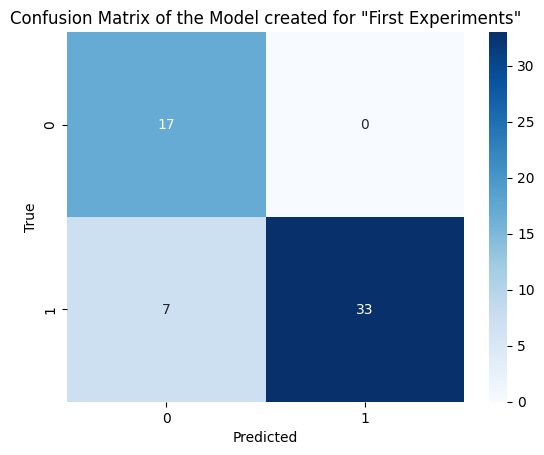

In [128]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of the Model created for "First Experiments"')

#### 6. Plot the training loss curve (it’s stored in the attribute loss_curve_ of a fit instance of the MLPClassifier).

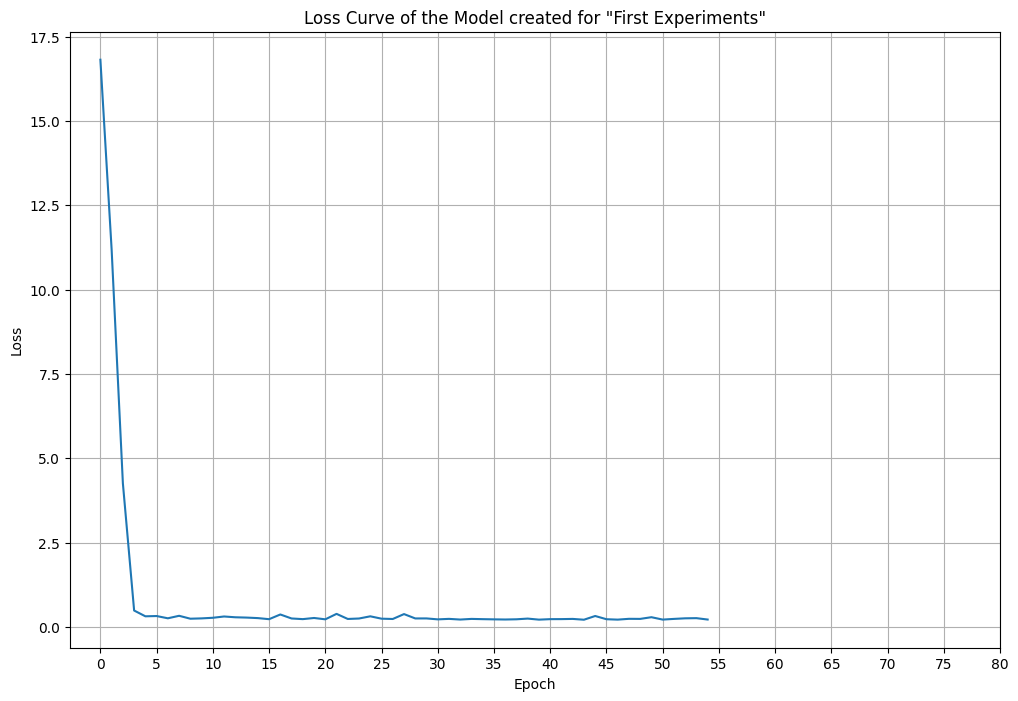

In [129]:
# gettling the loss curve
loss_values = mlp_classifier.loss_curve_
plt.figure(figsize=(12, 8))
sns.lineplot(x=range(len(loss_values)), y=loss_values)
plt.xlabel('Epoch')
plt.xticks(np.arange(0, 85, 5))
plt.ylabel('Loss')
plt.title('Loss Curve of the Model created for "First Experiments"')
plt.grid()

#### 7. Experiment with different initial learning rates (in ranges between 0.0001 and 0.1) and plot the resulting learning curves. Try to interpret the changes in the loss curves.

In [73]:
# function to train model with given learning rate
def train_model_with_given_training_rate(learning_rate, x_train, y_train):
    mlp_classifier = MLPClassifier(
        hidden_layer_sizes=(64,),
        activation='relu',
        solver='sgd',
        batch_size=100,
        momentum=0.0,
        alpha=0.0001,
        learning_rate_init=learning_rate,
        random_state=42
    )
    mlp_classifier.fit(x_train, y_train)
    return mlp_classifier

# function to get loss values of trained model
def get_loss_values(mlp_classifier):
    return mlp_classifier.loss_curve_

# funtion to get dict of loss values for different learning rates
def get_dict_of_loss_values(learning_rates, x_train, y_train):
    loss_values_dict = {}
    for learning_rate in learning_rates:
        mlp_classifier = train_model_with_given_training_rate(learning_rate, x_train, y_train)
        loss_values = get_loss_values(mlp_classifier)
        loss_values_dict[learning_rate] = loss_values
    return loss_values_dict


Text(0.5, 1.0, 'Loss Curves of the Model created for "First Experiments" with Different Learning Rates')

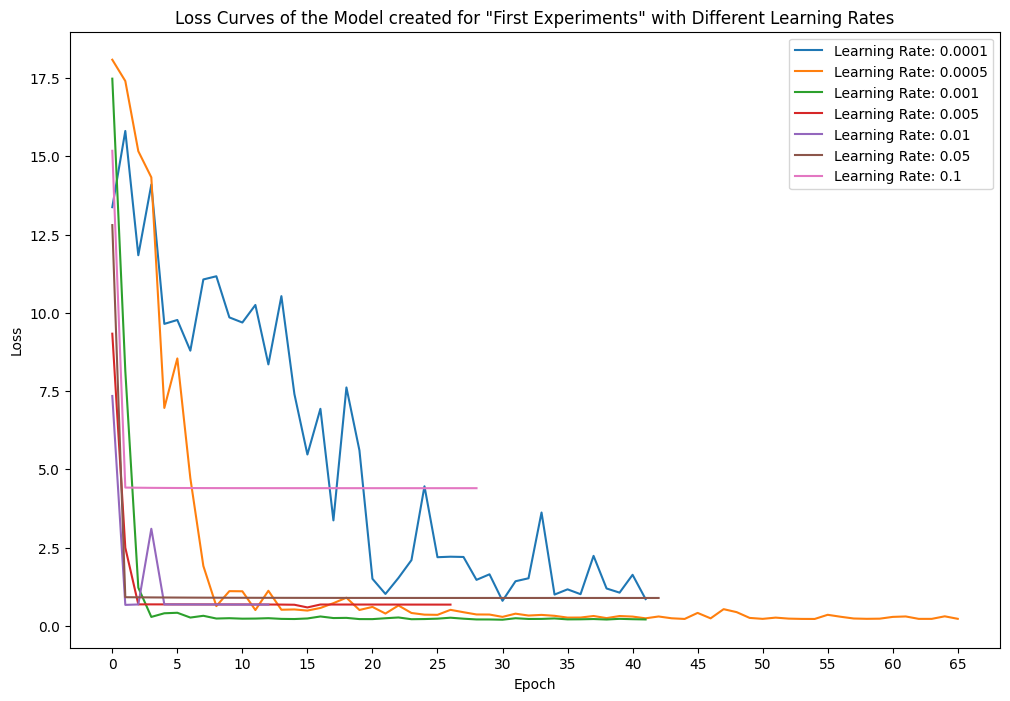

In [76]:
# create a list of learning rates
learining_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

# get x_train, y_train, x_test, y_test
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

# get dict of loss values for different learning rates
loss_values_dict = get_dict_of_loss_values(learining_rates, X, y)

# get maximum epoch for all learning rates
max_epoch = max([len(loss_values) for loss_values in loss_values_dict.values()])

# plot the loss curves
plt.figure(figsize=(12, 8))
for learning_rate, loss_values in loss_values_dict.items():
    sns.lineplot(x=range(len(loss_values)), y=loss_values, label=f'Learning Rate: {learning_rate}')
plt.xlabel('Epoch')
plt.xticks(np.arange(0, max_epoch+1, 5))
plt.ylabel('Loss')
plt.title('Loss Curves of the Model created for "First Experiments" with Different Learning Rates')

#### 8. Inspect the attribute coef_ of the MLPClassifier and interpret it. What does it represent? Can you make sense of its shape?


In [93]:
# geting the coef
coefs = mlp_classifier.coefs_
print(f'Number of layers: {len(coefs)}')

layer_one_weights = coefs[0]
layer_two_weights = coefs[1]

for i, layer in enumerate(coefs):
    print(f'Layer {i+1} Weights Shape: {layer.shape}')


Number of layers: 2
Layer 1 Weights Shape: (30, 64)
Layer 2 Weights Shape: (64, 1)


Shape of coefs[0]: (n_features, n_hidden_nodes) : 

- Rows correspond to input features.
- Columns correspond to neurons in the hidden layer.

Shape of coefs[1]: (n_hidden_nodes, n_output_nodes):

- Rows correspond to neurons in the hidden layer.
- Columns correspond to output neurons.

# Different Optimizers


Next, experiment with different optimizers and settings. Use an initial learning rate of
0.0001 and set the strength of L2 regularization to 0.001. 

Plot the training loss curves of the following four optimizers in a single plot and try to interpret the results:

• ’SGD Baseline’

• ’SGD with momentum’: enable momentum and set its value to 0.9

• ’SGD with decreasing lr’: set the parameter that decreases learning rate over training time.

• ’Adam’: Change optimizer from SGD to Adam with its default settings.

# Early Stopping Strategy

Now we want to introduce early stopping to our model’s training process, a strategy that is used to prevent overfitting. To do this, we need to make sure to dedicate a portion (scikitlearn uses 10% by default) of the data to validation. During training, this validation data is used to compute the validation loss. To simplify, training stops if validation loss increases.

Enable early stopping for all your different optimizers, plot the training loss curves again and interpret the results.


# Grid Search

Implement a grid search with 5-fold crossvalidation using GridSearchCV to find the best set of hyperparameters for your MLPClassifier. As we are focused on optimizers in this
session, make sure to include both Adam as well as SGD with momentum in your grid. Other parameters for your grid may include:

• learning rate

• number of hidden nodes and hidden layers

• activation function in the hidden layer

• batch size

Don’t forget to enable early stopping to limit training time while preventing overfitting